# Introduction to Data Science
## Homework 3

Student Name: Pruthviraj R Patil

Student Netid: prp7650
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the dataset's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is to split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier

In [31]:
def createSplitting(df):
    n=int((df.shape[0])*0.8)
    df=df.iloc[np.random.permutation(len(df))]
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    del(df_train['index'])
    del(df_test['index'])
    return df_train, df_test

In [32]:
#Place your code here
df=pd.read_csv("cell2cell_data.csv")
train_df, test_df=createSplitting(df)

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [33]:
#Place your code here
clf=DecisionTreeClassifier(criterion='entropy')
(x_train, y_train)=(train_df.iloc[:, :-1], train_df.iloc[:, -1:])
(x_test, y_test)=(test_df.iloc[:, :-1], test_df.iloc[:, -1:])
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

3\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

Text(0, 0.5, 'FEATURE IMPORTANCE')

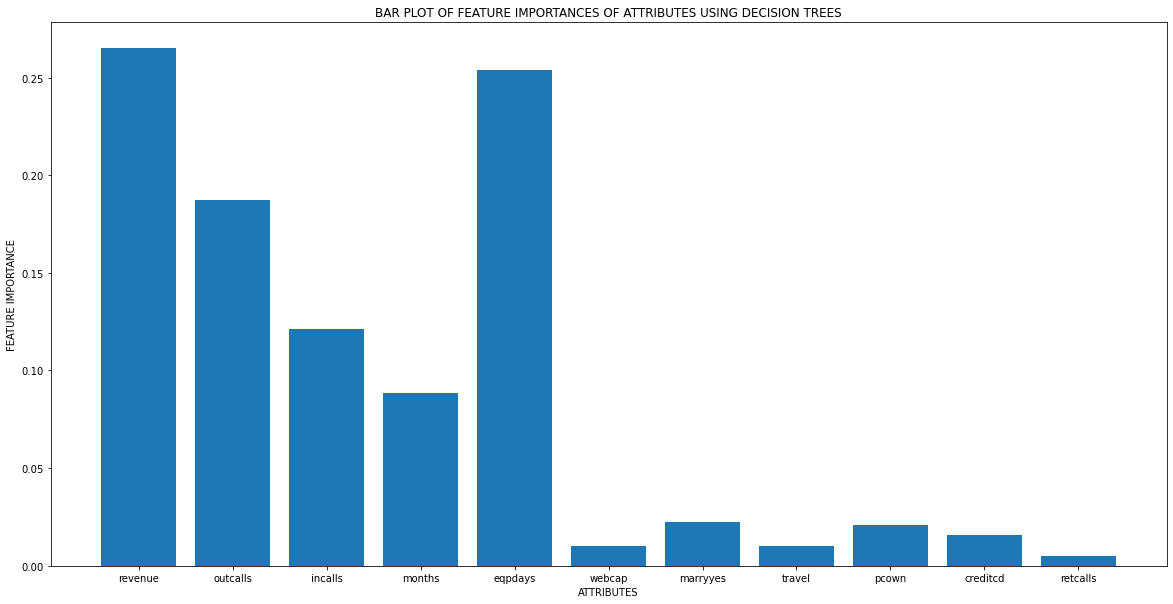

In [34]:
feature_importances=clf.feature_importances_
cols=np.array(x_train.columns)
plt.figure(figsize=(20, 10))
plt.bar(cols, feature_importances)
plt.title("BAR PLOT OF FEATURE IMPORTANCES OF ATTRIBUTES USING DECISION TREES")
plt.xlabel("ATTRIBUTES")
plt.ylabel("FEATURE IMPORTANCE")

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [35]:
#to find the relationship between top 3 features, lets perform covariance analysis. 
top1=train_df['revenue']
top2=train_df['eqpdays']
top3=train_df['outcalls']
print("The Covariance matrix between revenue and outcalls (has positive relation):\n", np.cov(top1, top3))
print("\nThe Covariance matrix between revenue and eqpdays (has negative relation):\n", np.cov(top1, top2))
print("\nThe Covariance matrix between eqpdays and outcalls (has negative relation):\n", np.cov(top2, top3))

The Covariance matrix between revenue and outcalls (has positive relation):
 [[1953.34241912  767.98427393]
 [ 767.98427393 1203.53033182]]

The Covariance matrix between revenue and eqpdays (has negative relation):
 [[ 1953.34241912 -2478.40210738]
 [-2478.40210738 64956.47565293]]

The Covariance matrix between eqpdays and outcalls (has negative relation):
 [[64956.47565293 -2151.36706501]
 [-2151.36706501  1203.53033182]]


In [36]:
top1=train_df['revenue']
top2=train_df['eqpdays']
top3=train_df['outcalls']
y_var=train_df['churndep']
print("The Covariance matrix between revenue and churn (has positive relation):\n", np.cov(top1, y_var))
print("\nThe Covariance matrix between eqpdays and churn (has negative relation):\n", np.cov(top2, y_var))
print("\nThe Covariance matrix between outcalls and churn (has negative relation):\n", np.cov(top3, y_var))

The Covariance matrix between revenue and churn (has positive relation):
 [[ 1.95334242e+03 -3.18050943e-01]
 [-3.18050943e-01  2.50001061e-01]]

The Covariance matrix between eqpdays and churn (has negative relation):
 [[6.49564757e+04 1.42910362e+01]
 [1.42910362e+01 2.50001061e-01]]

The Covariance matrix between outcalls and churn (has negative relation):
 [[ 1.20353033e+03 -7.02536103e-01]
 [-7.02536103e-01  2.50001061e-01]]


<p>
<span style="color:blue">
Place your response here
</span>
</p>

### RESPONSE:

The outcome of the covariance analysis is the covariance matrix which is symmetric and these values show the direction and distribution of multivariated data withrespect to each other in the multidimensional space.

Speaking technically, the below outcome shows that the revenue and outcalls are positively correlated and the other possible relations are negatively correlated. In the case of churn(dependent variable), the covariance shows that the eqpdays is the variable that flows inline with it. In the other words, where the Number of days the customer has had his/her current equipment (eqpdays) is more, the churn is less (customers have dropped the plan). Whereas, the realm where the Mean monthly revenue in dollars (revenue) and Mean number of outbound voice calls (outcalls) is more, the churn is less (customers didn't leave the company).

5\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? Remember: accuracy is the fraction of predictions whose labels were gotten right by the model. What conclusions can you derive from this?

(2 Points)

### RESPONSE:
The accuracy of model over the train data: 99.99%
The accuracy of model over the test data: 53.51%
From this we can conclude that the model trained knows what to predict for that data itself. Hence, when the out of box input (test data) is provided into the model, then the out of box errors occurs and hence we get 53.51% accuracy.

In [37]:
#function to get the accuracy
def accuracy(y_true,y_pred):
    y_pred=np.array(y_pred)
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    return (sum(accuracy)/len(y_pred))

In [38]:
#Place your code here 
y_predict_train=clf.predict(x_train)
y_predict_test=clf.predict(x_test)

train_accuracy=accuracy(y_predict_train, y_train)
test_accuracy=accuracy(y_predict_test, y_test)

print("\nAccuracy of the model over train data: ", train_accuracy)
print("\nAccuracy of the model over test data: ", test_accuracy)


Accuracy of the model over train data:  0.9999058557710412

Accuracy of the model over test data:  0.5269235596836952


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [51]:
min_samples_split=[i for i in range(100, 200, 10)]
min_samples_leaf=[i for i in range(5, 15)]

2\. Explain what your reasoning was for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
Place your response here
</span>
</p>

### Response for 2:

In general, the deeper we allow the decision tree to grow, the more complex the data model will become because we will greater number of splits and also it captures more information about the data leading to overfitting. 


Also, in the case of min_samples_leaf has to be less than the samples in the split in order to further allow splitting in the decision tree.


In this case, we see that the revenue variable (that has max importance) being numerical ranges from 0 to 861.11. Hence, the first splitting takes placed based on the range of these values.Also, we have about 16014 False and 15852 True values in the churndep variable which are expected to be evenly distributed across the splits. Min_samples_split is nothing but the minimum number of samples required to split an internal node. Whereas, min_samples_leaf is the minimum number of samples required to be at a leaf node. Thus, we cannot keep min_samples_leaf to be greater than 10-15 to procure a tangible model else too much of generalization will be induced. Whereas in the case of min_samples_split the range 100 to 200 with step value of 10 is considered as top important variables are numeric and there is a greater possibility that there will be atleast these many samples will be in the nodes to split further.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

In [52]:
#Place your code here
accuracies={}
for min_leaf in min_samples_leaf:
    for min_split in min_samples_split:
        temp_clf=DecisionTreeClassifier(min_samples_leaf=min_leaf, min_samples_split=min_split, criterion='entropy')
        temp_clf.fit(x_train, y_train)
        temp_prediction=temp_clf.predict(x_test)
        temp_key=(min_leaf, min_split)
        accuracies[temp_key]=accuracy(temp_prediction, y_test)

In [53]:
def neatPlot(accuracies, min_samples_leaf, min_samples_split):
    all_accs=[]
    for leaf in min_samples_leaf:
        temp=[]
        for split in min_samples_split:
            temp.append(accuracies[(leaf, split)])
        all_accs.append(temp)
    
    x=[i for i in range(len(min_samples_split))]
    
    my_xticks = min_samples_split    
    current_leaf_counter=0
    for accs in all_accs:
        plt.figure(figsize=(20,5))
        plt.xticks(x, my_xticks)
        plt.plot(accs)
        plt.xlabel("MIN SAMPLE SPLIT")
        plt.ylabel("ACCURACY")
        plt.title("ACCURACIES FOR ALL THE MIN SAMPLES SPLIT WITH RESPECT TO THE MIN SAMPLE LEAF VALUE OF"+str(min_samples_leaf[current_leaf_counter]))

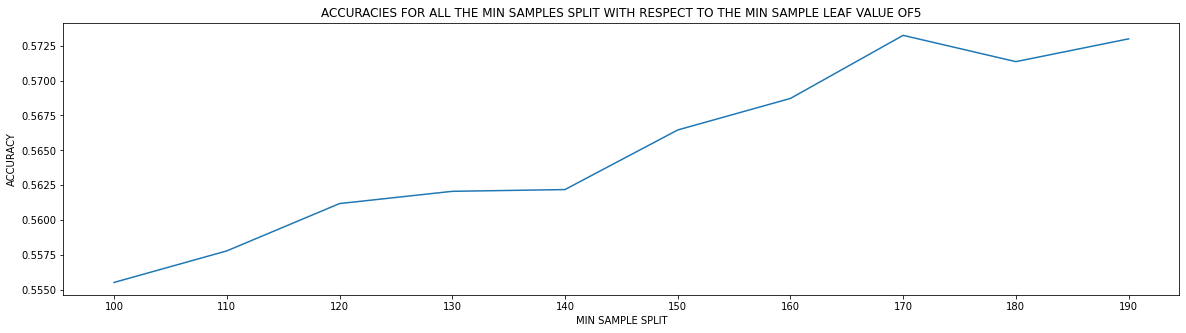

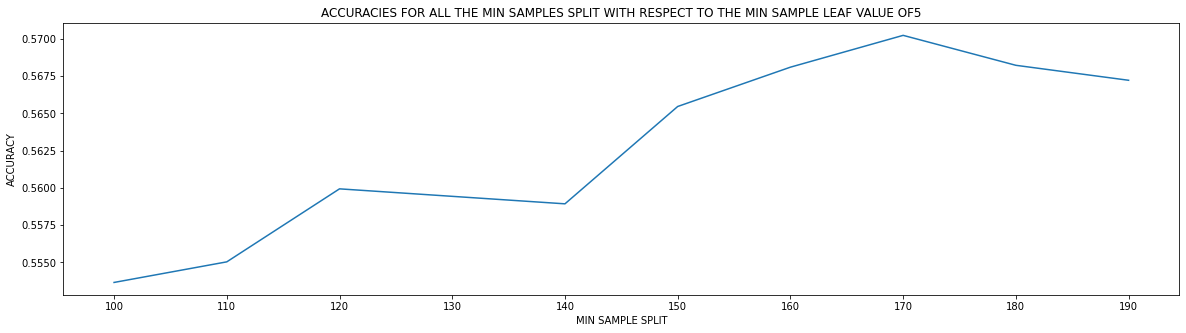

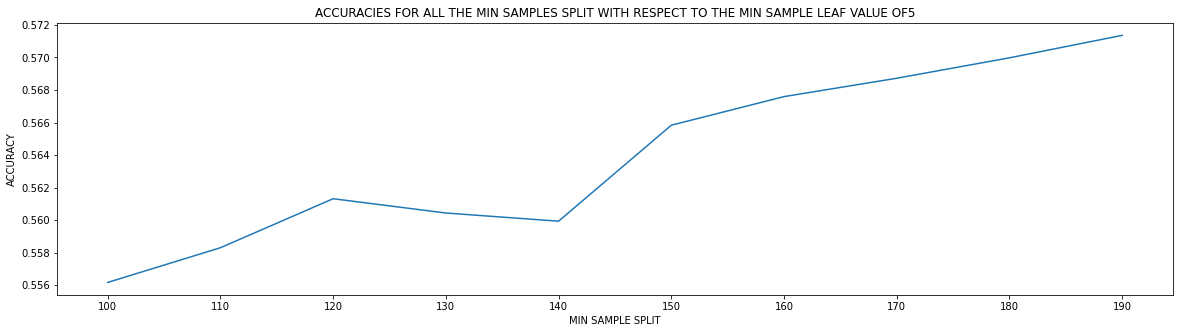

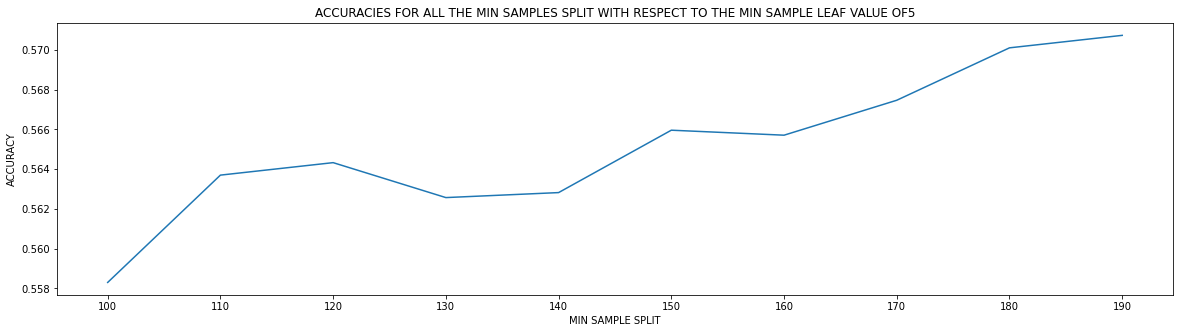

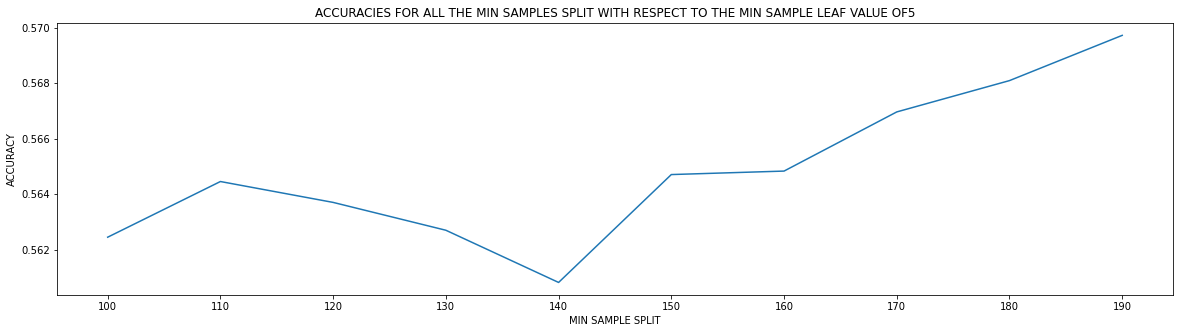

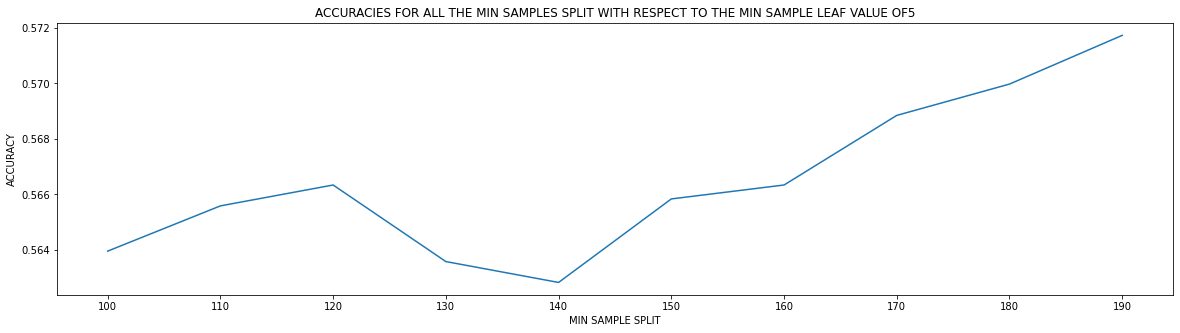

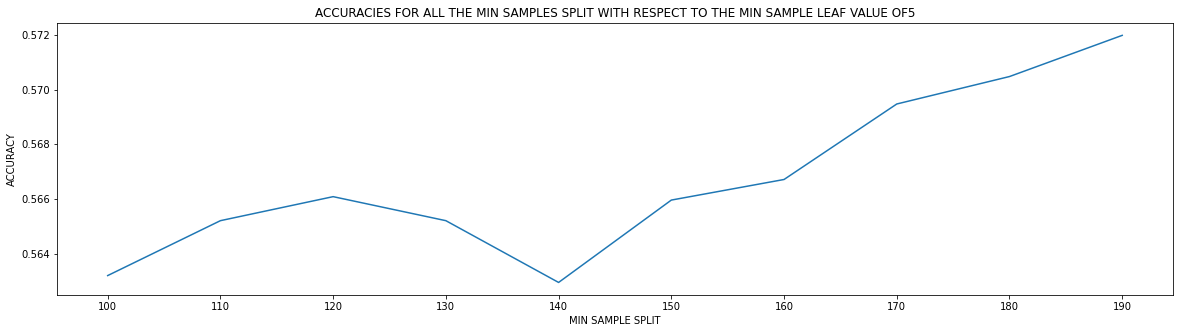

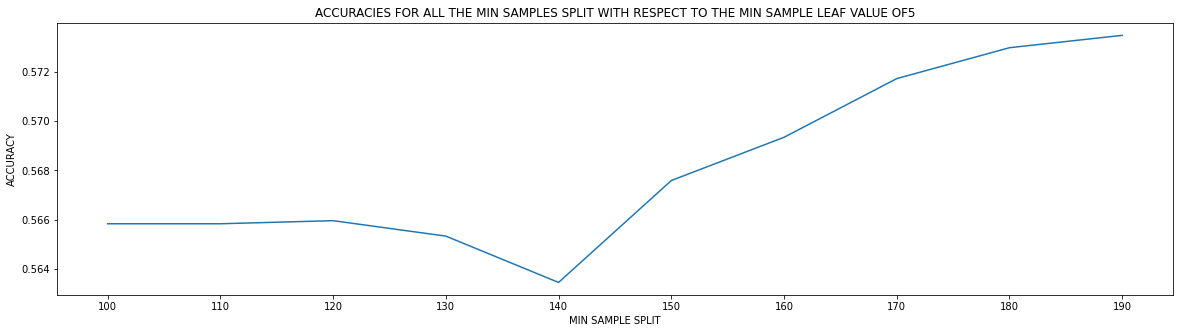

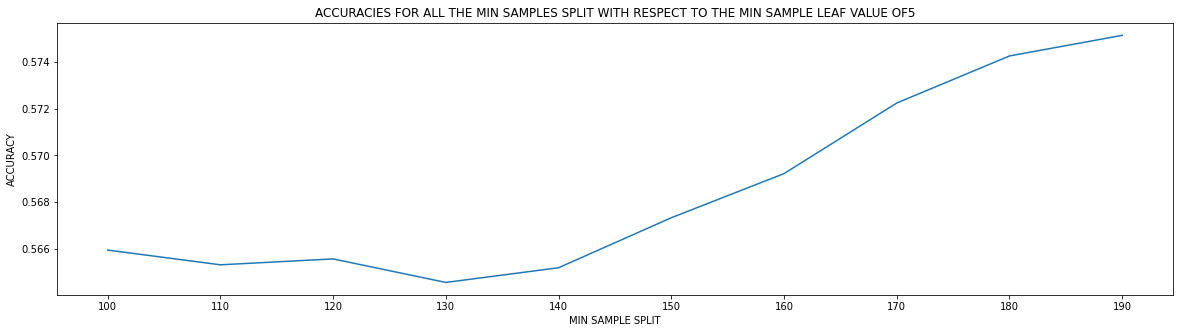

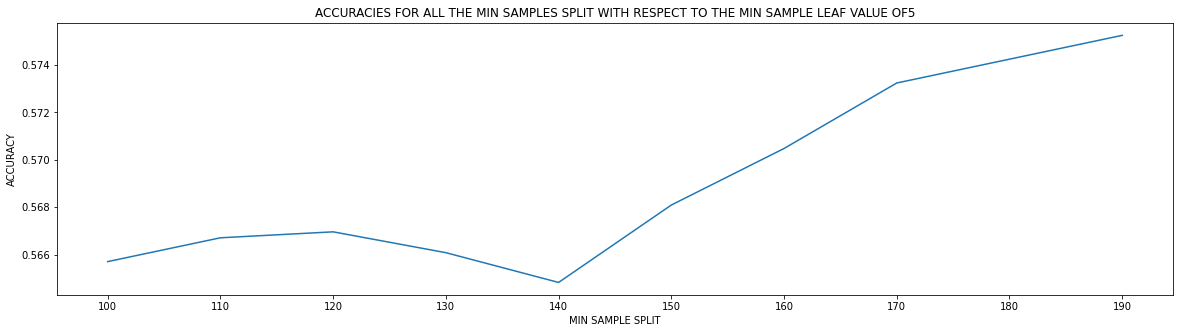

In [54]:
neatPlot(accuracies, min_samples_leaf, min_samples_split)

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
Place your response here
</span>
</p>

### Response for 4:

The best configuration from the above review is : min_sample_split=190; min_sample_leaf=13. The accuracy was: 57.53%

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
Place your response here
</span>
</p>

### Response for 5:

We saw the importance of the variables in predicting the churn from the decision trees algorithm, the top three 
variables that correlates with the churndep value. They are: Revenue, eqpdays, outcalls. We also saw that the model's performance increases by tweaking the hyperparameters of the model designed using Decision tree algorithm. min_samples_split and min_samples_leaf hyperparameters as seen can be used to utilize those top three features in order to predict the churn in a tangible way.

The attributes can be used in the dashboard where they can be updated in the daily bases and the churn amount can be predicted in order to make sure to either depreciate or increase the future values with respect to those features to both reduce the churn and predict the churn in a better manner.

Nevertheless, there are other hyperparameters in the Decision Tree algorithm. If not just Decision Tree algorithm, there are many other classification models that can be used which do not take the correlation amongst the dependent features into consideration for churn prediction such as Support Vector Machine.

### Part 3: Model selection with cross-validation (5 points)
In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [58]:
#Place your code here
#Uncomment line below
def xValDecisionTree(dataset, label_name, k, max_depth_sequence):
    #shuffle dataset
    dataset=dataset.iloc[np.random.permutation(len(dataset))]
    #split dataset into k fold and store them in the dictionary
    datasets={}
    curr_len=0
    curr_fold=0
    while(curr_len<=(dataset.shape[0])):
        temp=(dataset.shape[0])//k
        test=dataset.iloc[curr_len:curr_len+temp+1, :]
        train=dataset.iloc[curr_len+temp+1:, :]
        datasets[curr_fold]=[train, test]
        curr_fold+=1
        curr_len+=temp
            
    #get accuracies of all k parts
    ret={}
    for f in range(k):
        (train, test)=(datasets[f][0], datasets[f][1])
        x_tr=train.iloc[:, :-1]
        y_tr=train.iloc[:, -1:]
        x_te=test.iloc[:, :-1]
        y_te=test.iloc[:, -1:]
        for value in max_depth_sequence:
            temp_clf=DecisionTreeClassifier(criterion='entropy', max_depth=value)
            temp_clf.fit(x_tr, y_tr)
            temp_pred=temp_clf.predict(x_te)
            accuracy_value_f=accuracy(temp_pred, y_te)
            if not value in ret:
                ret[value]=[accuracy_value_f]
            else:
                ret[value].append(accuracy_value_f)
    return ret

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

#### Response for 1:

In [59]:
#Place your code and answers here. You can create more cells if you want.
max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]

#### Response for 2:

In [60]:
accs=xValDecisionTree(df, 'churndep', 10, max_depth_sequence)

#### Response for 3:

In [61]:
for key, val in accs.items():
    print("\nFor the key of: "+str(key)+" the maximum value of accuracy is:"+str(max(val)))


For the key of: None the maximum value of accuracy is:0.5444277108433735

For the key of: 2 the maximum value of accuracy is:0.5891064257028112

For the key of: 4 the maximum value of accuracy is:0.6016566265060241

For the key of: 8 the maximum value of accuracy is:0.5966365461847389

For the key of: 16 the maximum value of accuracy is:0.5780622489959839

For the key of: 32 the maximum value of accuracy is:0.5514558232931727

For the key of: 128 the maximum value of accuracy is:0.5406626506024096

For the key of: 256 the maximum value of accuracy is:0.5476907630522089

For the key of: 512 the maximum value of accuracy is:0.5484437751004017


#### Response for 4:

We can see below that the key that has max avg accuracy is 4. The range associated is also shown along with it and we can say from the inference that yes, the range overlaps with the range of keys 2, 8. This is because that the model performance with respect to every particular chunk of train and test case of the 10 fold cross validations increases as we reach the optimal value of the hyperparameter of max height and if it moves away from the optimal value the performance too decrease gradually. So, the range with respect to one key overlaps with the range of it's neighbor keys.

In [62]:
for key, val in accs.items():
    _range=str((min(val), max(val)))
    mean=str(sum(val)/len(val))
    std=str(np.std(np.array(val)))
    print("\nFor the key of: "+str(key)+" the range value of accuracy is: "+_range+ " mean is: "+mean+" stdev is: "+std)


For the key of: None the range value of accuracy is: (0.5020080321285141, 0.5444277108433735) mean is: 0.5273092369477912 stdev is: 0.011593994781285184

For the key of: 2 the range value of accuracy is: (0.5020080321285141, 0.5891064257028112) mean is: 0.5733684738955823 stdev is: 0.02421949444032605

For the key of: 4 the range value of accuracy is: (0.5020080321285141, 0.6016566265060241) mean is: 0.5831325301204819 stdev is: 0.027973786683382646

For the key of: 8 the range value of accuracy is: (0.5020080321285141, 0.5966365461847389) mean is: 0.5748995983935743 stdev is: 0.027379280597712736

For the key of: 16 the range value of accuracy is: (0.5020080321285141, 0.5780622489959839) mean is: 0.5538152610441767 stdev is: 0.021690639524977854

For the key of: 32 the range value of accuracy is: (0.5020080321285141, 0.5514558232931727) mean is: 0.5291415662650603 stdev is: 0.012586518736488223

For the key of: 128 the range value of accuracy is: (0.5020080321285141, 0.54066265060240

#### Response for 5:

Looking at the above analysis, I would choose max_depth = 4 as the mean value of accuracy is 58.29% and also, when combined with the min_sample_split = 150 and min_sample_leaf=14 (which are the predominant values for hyper parameters), we get: 59.27% accuracy. This is also because, untill depth 4, our top 4 features will be utilized to split the data (best case) which seems to be yeilding better accuracy than considering all the features.

In [63]:
fin_clf=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=13, min_samples_split=150, max_depth=4)
fin_clf.fit(x_train, y_train)
fin_predict=fin_clf.predict(x_test)
accuracy(fin_predict, y_test)

0.5944521149742689